# 🌎 **Air Quality Prediction** 

## **Project Overview**
This notebook explores **Air Quality Index (AQI)** prediction across different states in the US. Using machine learning models like **Linear Regression**, we aim to predict AQI based on historical pollutant data.
---
## **📊 Data Overview**
The dataset contains:
- **Particle Concentration Levels**: PM2.5, PM10, NO2, O3, CO
- **Location**: State and Population
---
## **📈 Results and Evaluation**
Key evaluation metrics:
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R-Squared (R²)**
We'll also visualize **predicted vs. actual AQI values** to gauge model performance.
---


In [4]:
# Data Cleaning
import pandas as pd 
import numpy as np

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA


# Split Data for Models
from sklearn.model_selection import train_test_split

# Metrics
from sklearn import metrics

# statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import qqplot


In [5]:
df = pd.read_csv('../Processed_Data/AQI_Final.csv')

In [6]:
df.describe()

,Year,Ozone Average,Carbon Average,Nitrogen Average,Sulfur Average,PM2.5 Average,PM10 Average,Ozone AQI,Carbon AQI,Nitrogen AQI,...,Plug-In Hybrid Electric (PHEV),Hybrid Electric (HEV),Biodiesel,Ethanol/Flex (E85),Compressed Natural Gas (CNG),Gasoline,Diesel,Unknown Fuel,Renewable Vehicles,Non-Renewable Vehicles
count,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.0,400.000000,400.000000,...,400.000000,4.000000e+02,400.000000,4.000000e+02,400.000000,4.000000e+02,4.000000e+02,400.000000,4.000000e+02,4.000000e+02
mean,2019.500000,0.0,0.257750,11.460000,1.925000,7.269250,15.246750,0.0,2.695000,10.715000,...,13207.000000,1.010095e+05,18806.750000,4.770100e+05,7914.500000,4.668522e+06,1.574328e+05,47065.500000,6.361850e+05,4.873020e+06
std,2.294157,0.0,0.084604,5.274272,3.104589,2.186534,9.785568,0.0,1.093143,4.935552,...,39326.671213,1.839848e+05,45322.288712,4.764818e+05,11686.405347,5.144129e+06,1.619901e+05,36343.377836,6.966617e+05,5.311887e+06
min,2016.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,100.000000,3.400000e+03,0.000000,3.660000e+04,0.000000,4.486000e+05,1.100000e+04,3700.000000,5.620000e+04,4.892000e+05
25%,2017.750000,0.0,0.200000,8.000000,1.000000,6.200000,11.400000,0.0,2.000000,8.000000,...,1500.000000,2.182500e+04,0.000000,1.397000e+05,300.000000,1.446625e+06,7.282500e+04,18625.000000,1.848250e+05,1.589775e+06
50%,2019.500000,0.0,0.300000,12.000000,1.000000,7.600000,16.300000,0.0,3.000000,11.000000,...,4400.000000,5.060000e+04,0.000000,3.700000e+05,3850.000000,3.309300e+06,1.235500e+05,37050.000000,4.893500e+05,3.492750e+06
75%,2021.250000,0.0,0.300000,15.000000,2.000000,8.600000,20.025000,0.0,3.000000,14.000000,...,11200.000000,1.143500e+05,27250.000000,6.053750e+05,12600.000000,5.614200e+06,1.914750e+05,67350.000000,7.697250e+05,5.989100e+06
max,2023.000000,0.0,0.500000,27.000000,39.000000,14.500000,51.300000,0.0,6.000000,25.000000,...,410700.000000,1.703200e+06,460700.000000,3.250000e+06,80600.000000,3.119190e+07,1.107000e+06,213100.000000,4.886700e+06,3.193510e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            400 non-null    int64  
 1   State Name                      400 non-null    object 
 2   Ozone Average                   400 non-null    int64  
 3   Carbon Average                  400 non-null    float64
 4   Nitrogen Average                400 non-null    int64  
 5   Sulfur Average                  400 non-null    int64  
 6   PM2.5 Average                   400 non-null    float64
 7   PM10 Average                    400 non-null    float64
 8   Ozone AQI                       400 non-null    int64  
 9   Carbon AQI                      400 non-null    int64  
 10  Nitrogen AQI                    400 non-null    int64  
 11  Sulfur AQI                      400 non-null    int64  
 12  PM2.5 AQI                       400 

In [8]:
df = df.dropna()

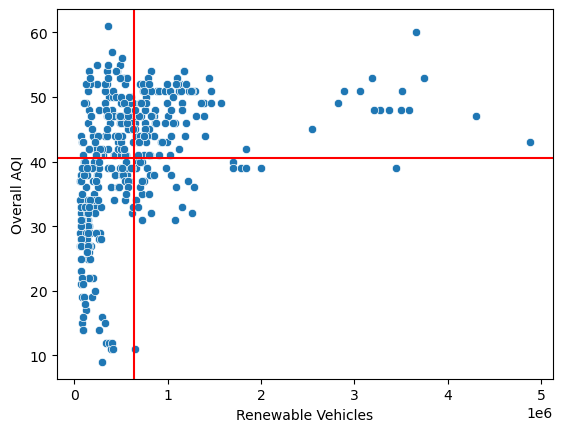

In [9]:
ax = sns.scatterplot(df, x='Renewable Vehicles', y='Overall AQI')
ax.axvline(x=df['Renewable Vehicles'].mean(), color='red',  label='Mean Renewable Vehicles')
ax.axhline(y=df['Overall AQI'].mean(), color='red',  label='Mean Overall AQI')

In [10]:
X = df[['Population', 'Renewable Vehicles', 'Non-Renewable Vehicles']]
y = df['Overall AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

rf = RandomForestRegressor(n_estimators=250, random_state=50)  
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)


print("Mean Absolute Error:", mae)

Mean Absolute Error: 5.022799999999999


In [11]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})


In [12]:
results_df

,Actual,Predicted
146,47,46.896
332,39,47.444
67,53,49.164
362,51,48.448
102,44,47.168
...,...,...
393,39,44.184
50,56,46.532
24,44,39.848
389,48,40.180


In [47]:
def ARMIA_MODEL(state_name):
    curr_df = df[df['State Name'] == state_name]

    # Assuming `df` has 'Year' and 'Overall AQI' columns
    # Ensure 'Year' is an integer and set it as the index
    curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
    curr_df.set_index('Year', inplace=True)

    # Sort data by year
    curr_df = curr_df.sort_index()

    # Split data into training and test sets
    train_size = int(len(curr_df) * 0.9)
    train, test = curr_df['Overall AQI'][:train_size], curr_df['Overall AQI'][train_size:]

    # Fit ARIMA model on the training data
    model = ARIMA(train, order=(1, 1, 1))  # Adjust p, d, q as needed
    arima_result = model.fit()

   # Make a prediction only for 2023
    predicted = arima_result.predict(start=2023, end=2023, typ='levels').iloc[0]
    actual_2023 = test.loc[2023]  # Get the actual AQI value for 2023

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(train, label='Training Data')
    #plt.plot(test, label='Actual AQI')

    # Plot the predicted AQI for 2023 as a dot
    plt.scatter(2023, predicted, color='red', label='Predicted AQI', zorder=5)
    plt.scatter(2023, actual_2023, color='blue', label='Actual AQI', zorder=5)

    plt.xlabel('Year')
    plt.ylabel('Overall AQI')

    plt.title(f'ARIMA Model - AQI Predictions for {state_name}')
    plt.legend()
    plt.show()

    # Print out the model summary
    #print(arima_result.summary())
    print(f"Predicted: {predicted} | Actual: {actual_2023}")
    diff = abs(predicted - actual_2023)
    print(diff)
    return diff


In [51]:
states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", 
    "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", 
    "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maryland", 
    "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", 
    "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", 
    "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", 
    "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", 
    "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"
]


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

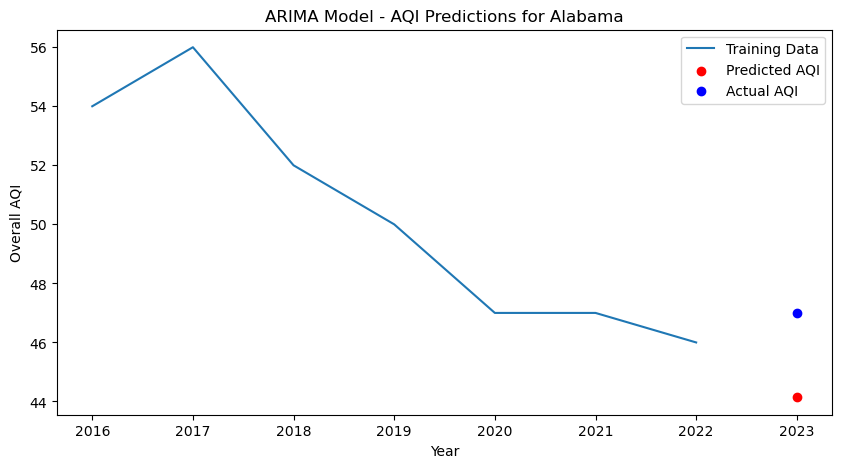

Predicted: 44.144580839819675 | Actual: 47
2.8554191601803254


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

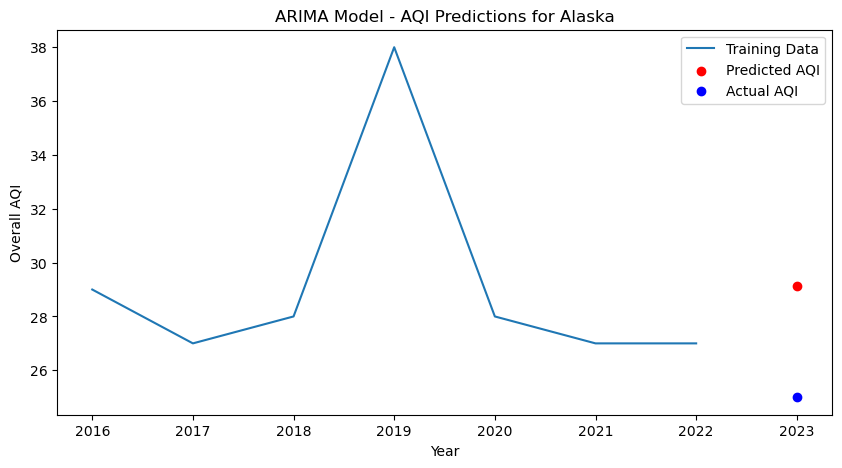

Predicted: 29.13119119140551 | Actual: 25
4.1311911914055095


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

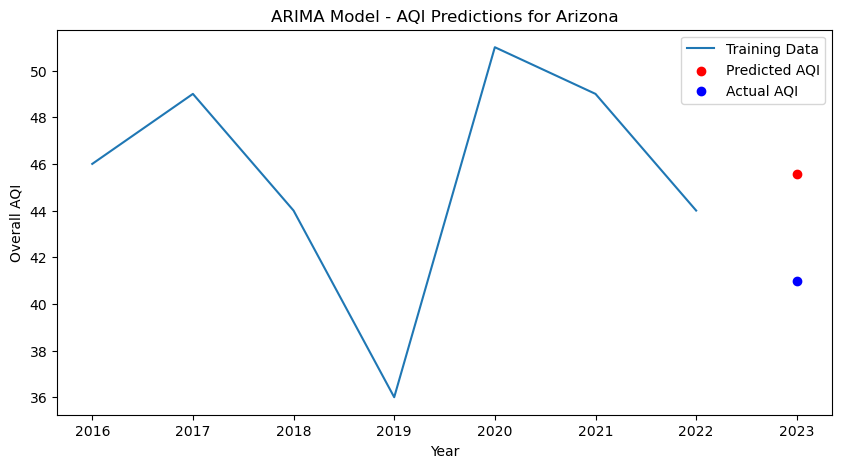

Predicted: 45.57799935204571 | Actual: 41
4.577999352045708


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

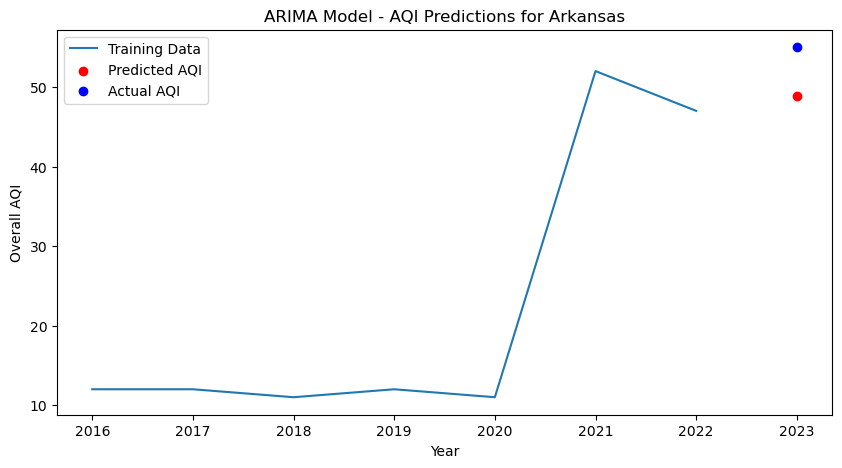

Predicted: 48.836859770821206 | Actual: 55
6.163140229178794


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

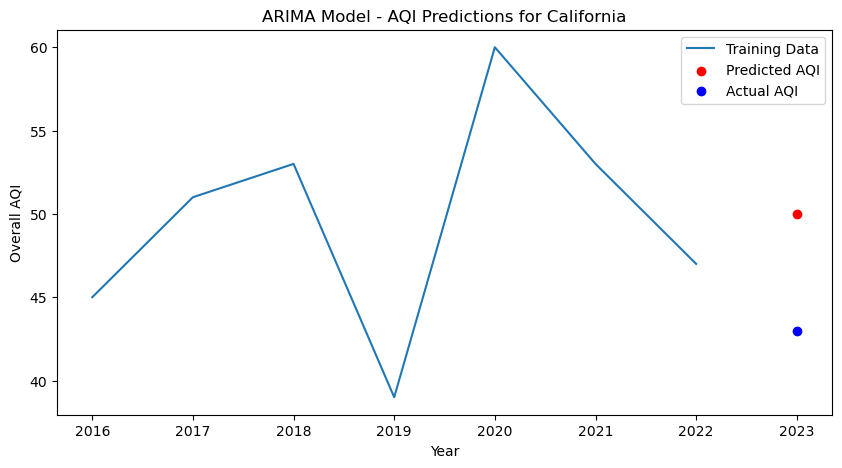

Predicted: 50.01646725708089 | Actual: 43
7.01646725708089


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

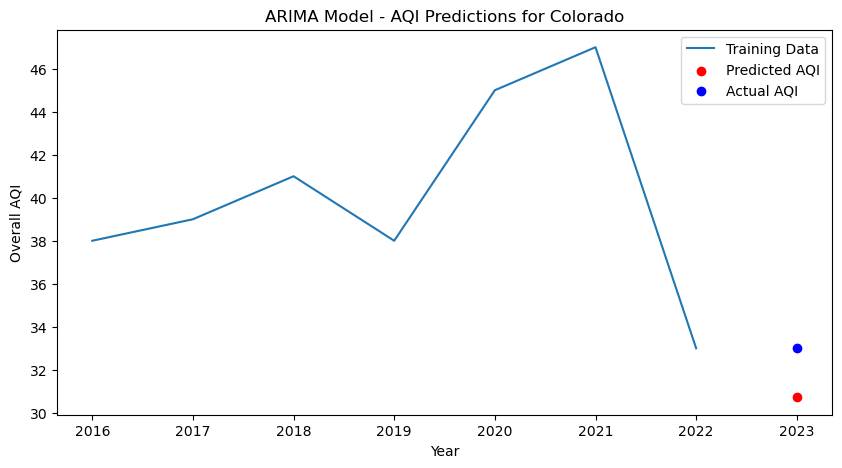

Predicted: 30.723842571158613 | Actual: 33
2.276157428841387


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

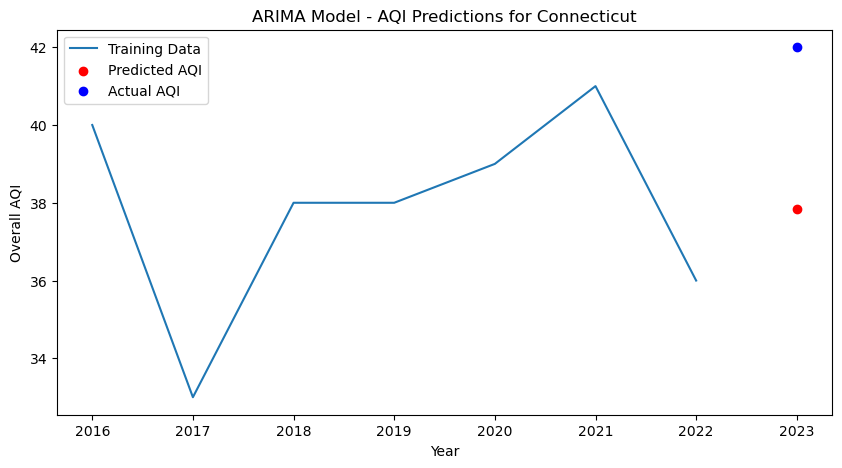

Predicted: 37.849883552066856 | Actual: 42
4.150116447933144


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

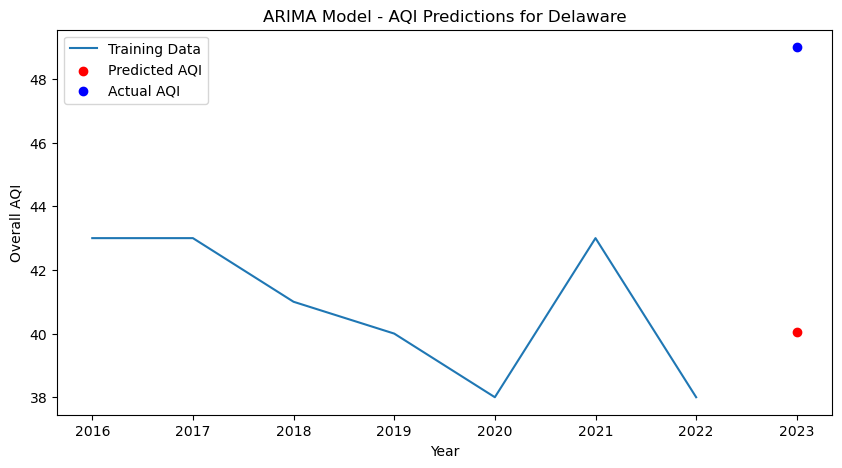

Predicted: 40.04792806611216 | Actual: 49
8.952071933887837


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

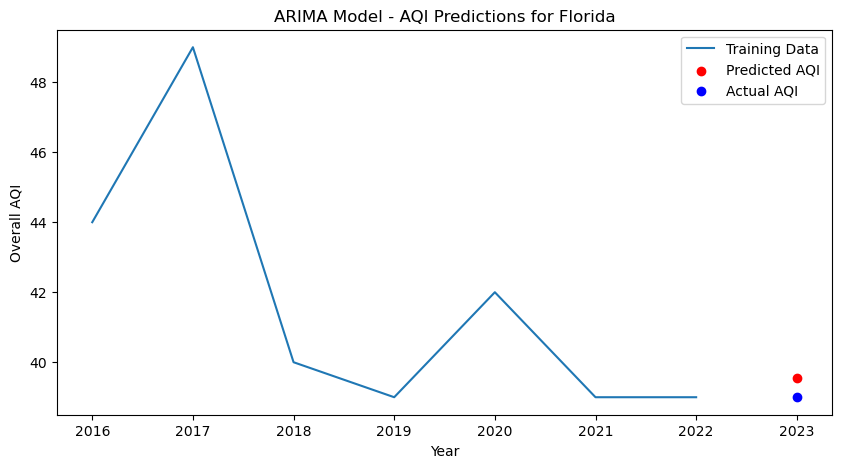

Predicted: 39.56280766603938 | Actual: 39
0.562807666039383


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

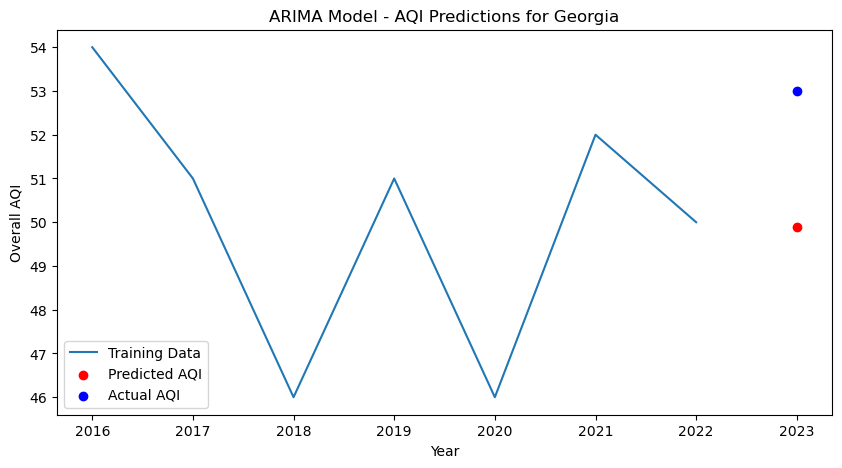

Predicted: 49.88584119399012 | Actual: 53
3.1141588060098826


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

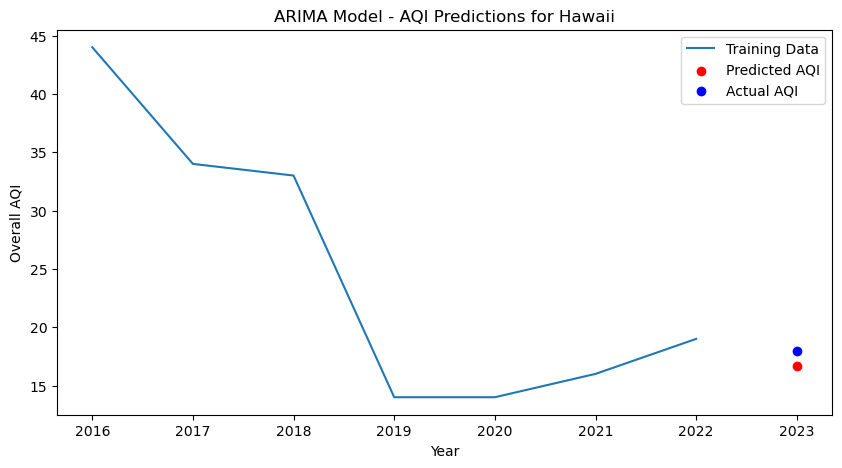

Predicted: 16.71197321815726 | Actual: 18
1.2880267818427384


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

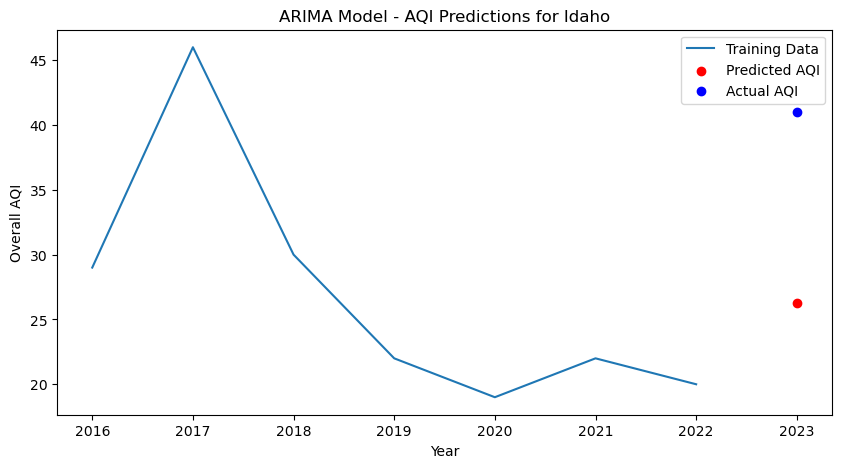

Predicted: 26.243873561077606 | Actual: 41
14.756126438922394


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

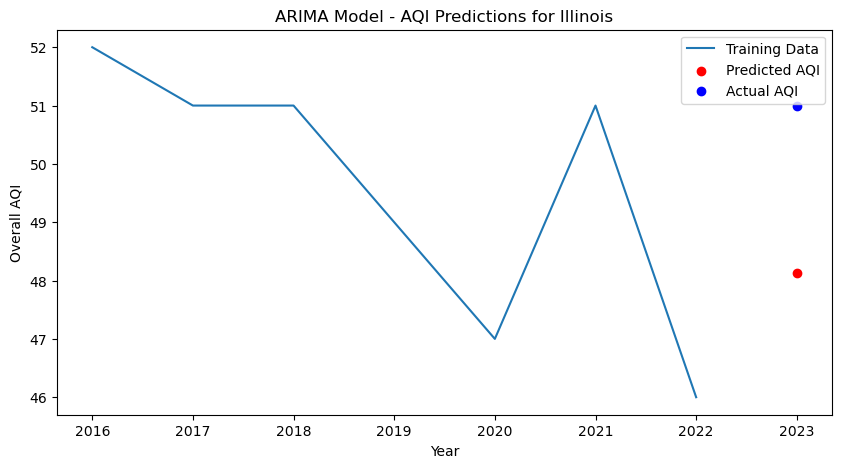

Predicted: 48.12426657236644 | Actual: 51
2.8757334276335627


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

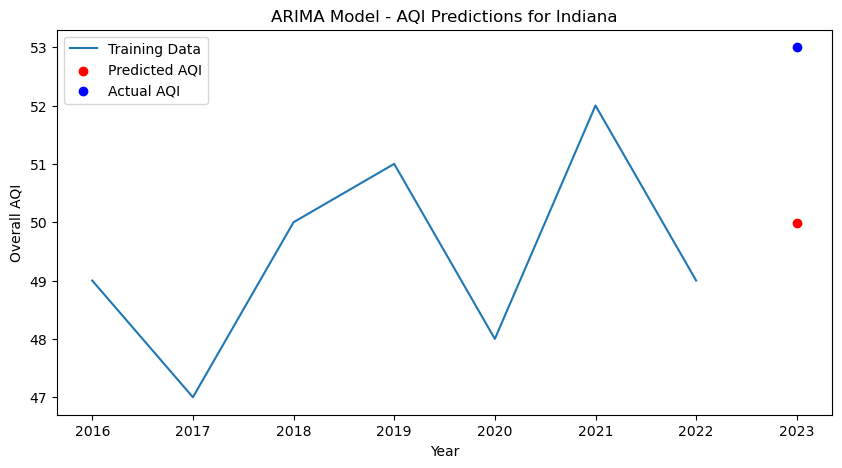

Predicted: 49.98750468666801 | Actual: 53
3.012495313331989


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

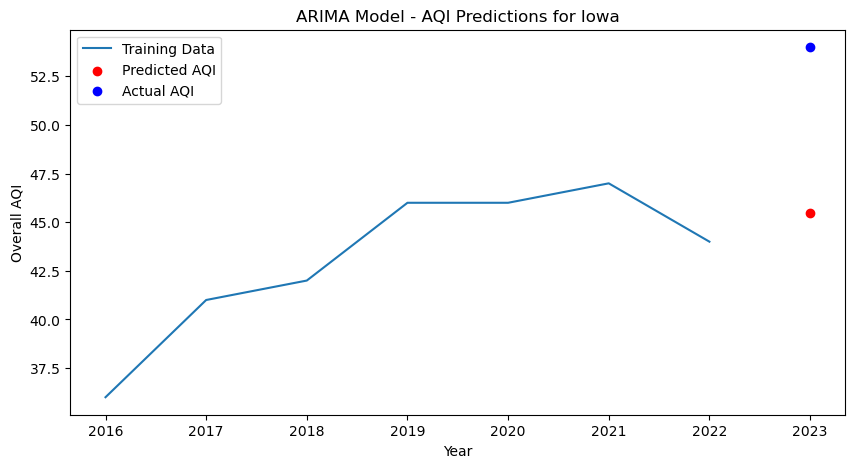

Predicted: 45.47891348616528 | Actual: 54
8.521086513834717


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

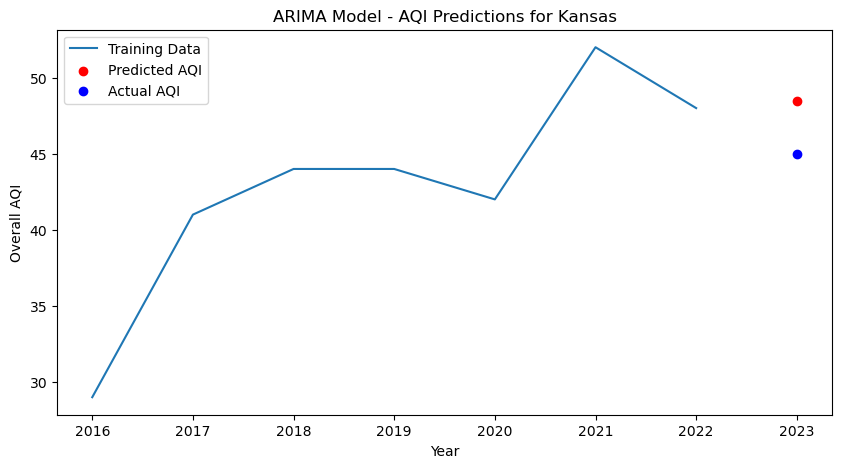

Predicted: 48.48509257337968 | Actual: 45
3.4850925733796814


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

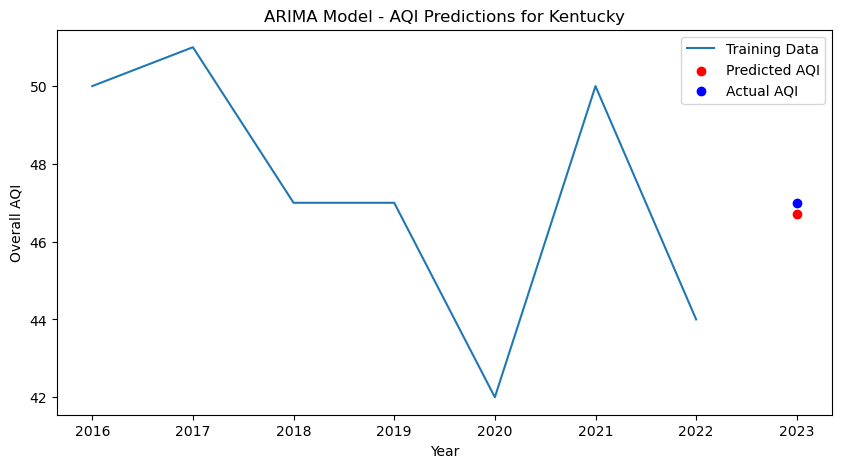

Predicted: 46.723344452625014 | Actual: 47
0.2766555473749861


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

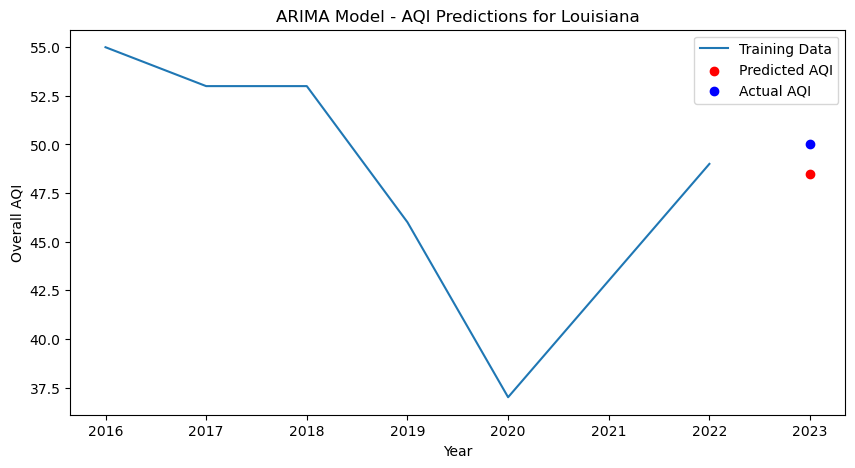

Predicted: 48.47251615858719 | Actual: 50
1.5274838414128098


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

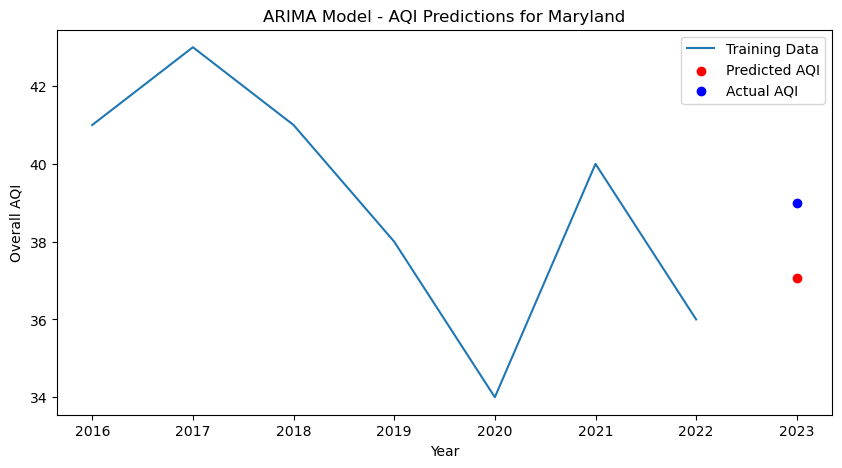

Predicted: 37.074575429433956 | Actual: 39
1.9254245705660438


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

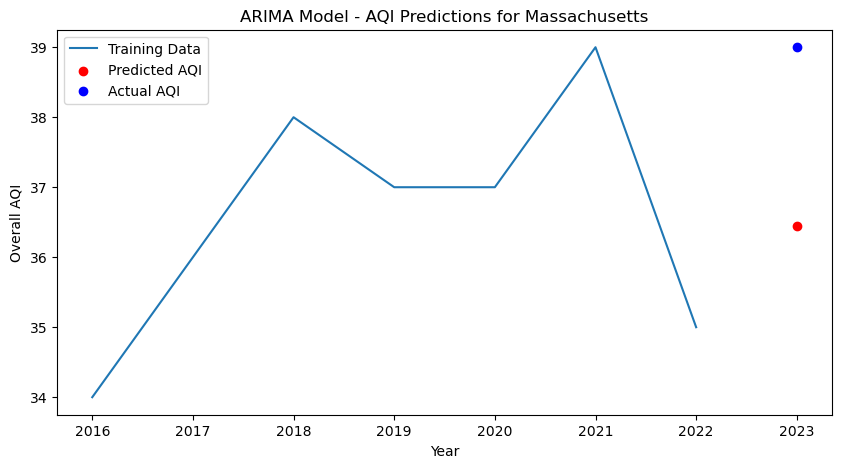

Predicted: 36.43922714527377 | Actual: 39
2.560772854726231


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

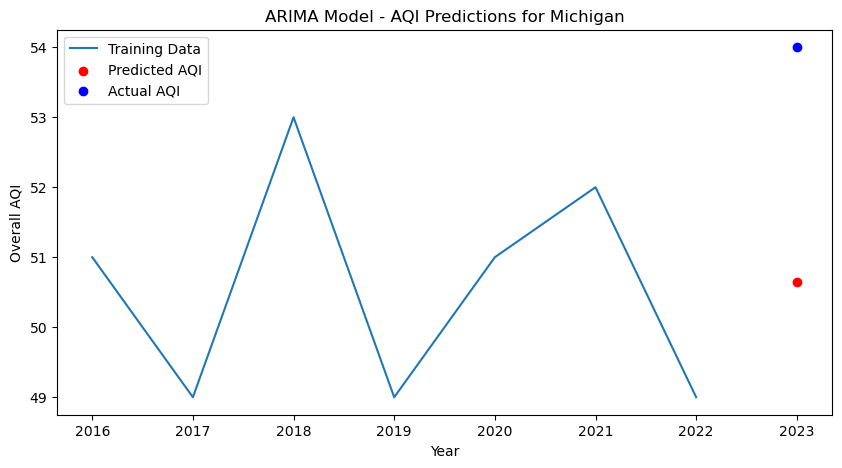

Predicted: 50.644824397437695 | Actual: 54
3.355175602562305


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

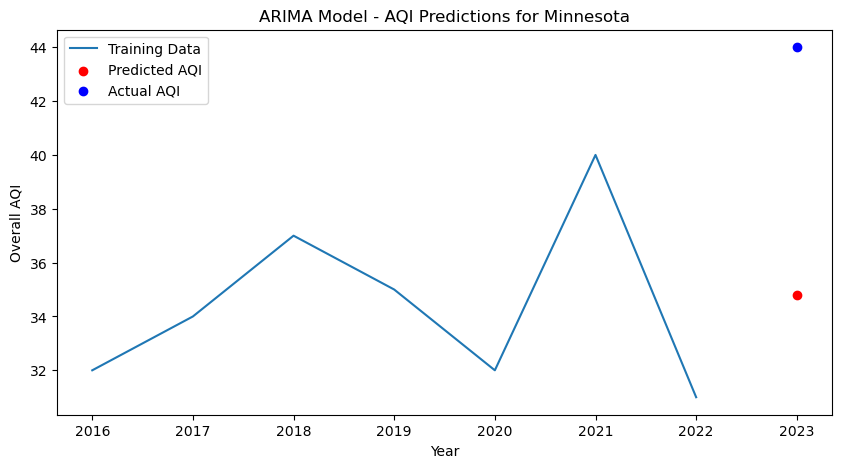

Predicted: 34.783736392489935 | Actual: 44
9.216263607510065


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

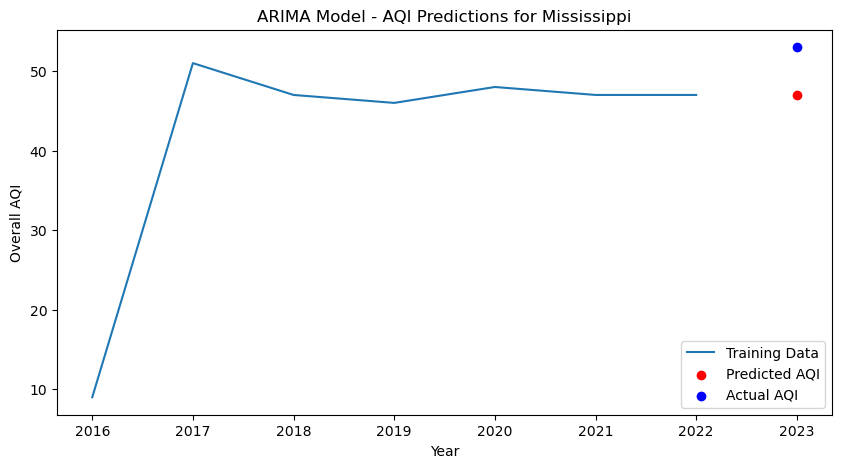

Predicted: 47.03088964877489 | Actual: 53
5.969110351225112


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

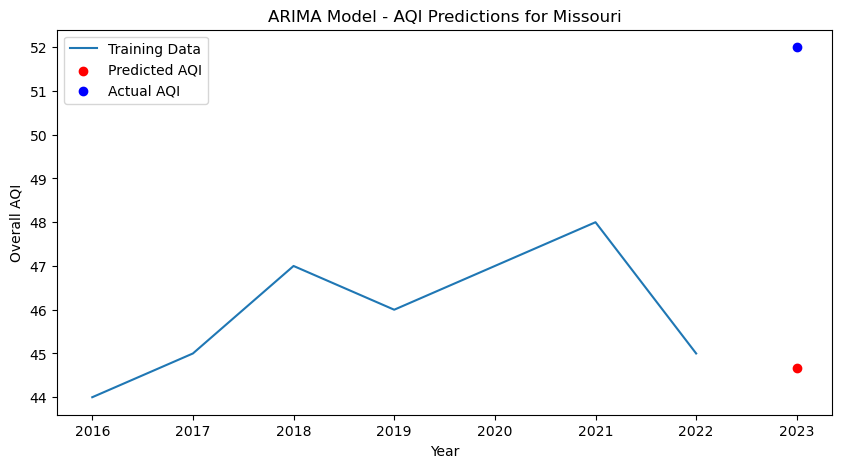

Predicted: 44.66821783994043 | Actual: 52
7.331782160059568


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

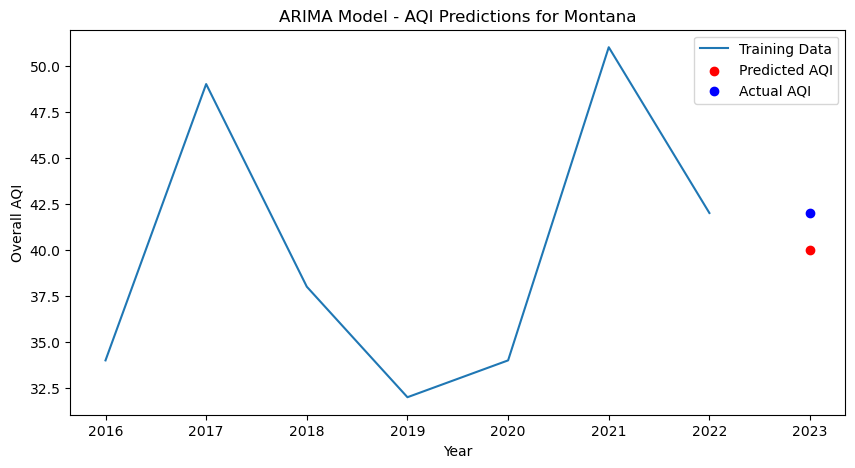

Predicted: 40.00446987237276 | Actual: 42
1.9955301276272408


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

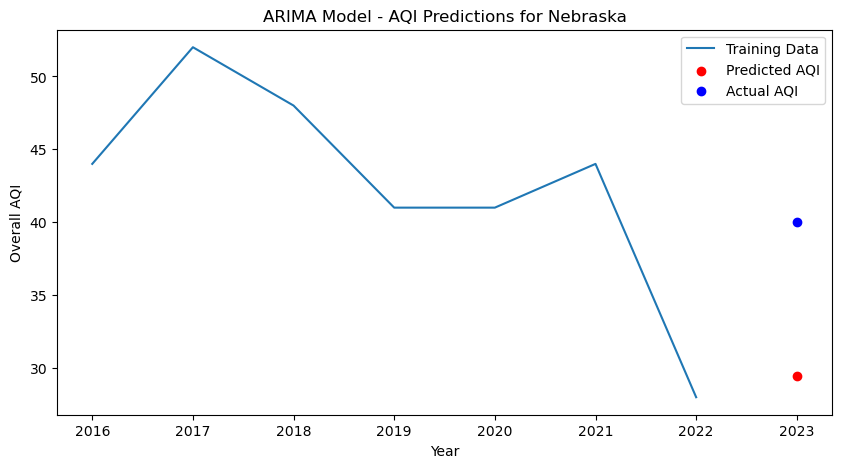

Predicted: 29.464727560095607 | Actual: 40
10.535272439904393


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

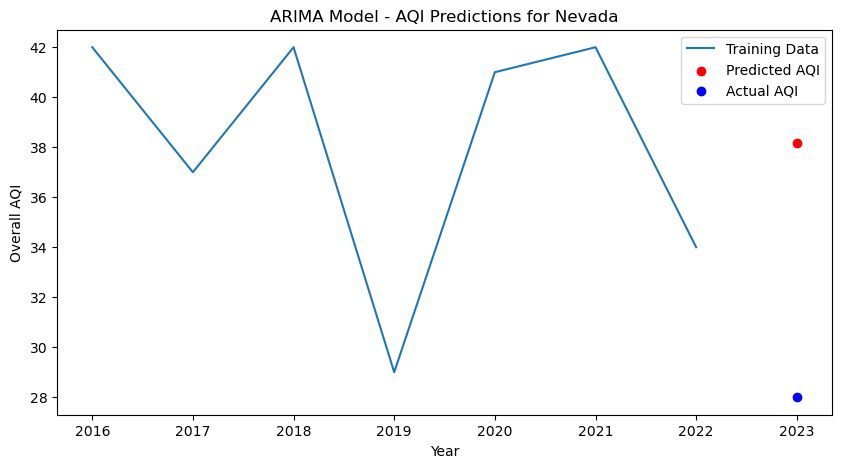

Predicted: 38.15632800541076 | Actual: 28
10.156328005410757


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

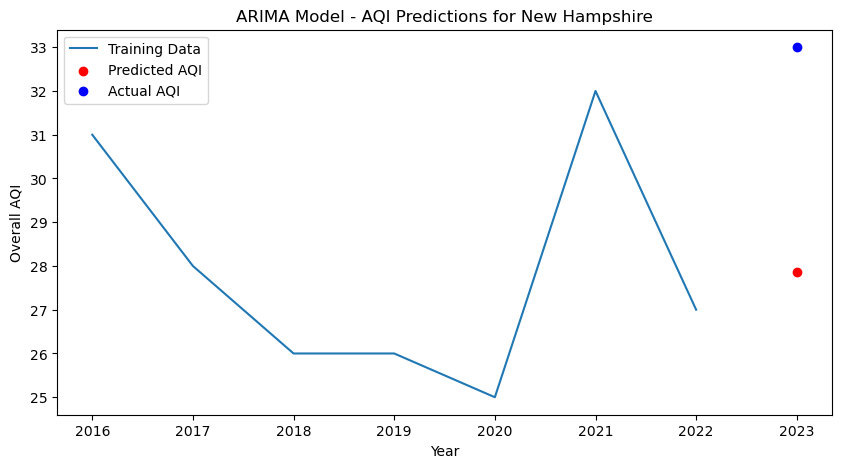

Predicted: 27.853961297836513 | Actual: 33
5.146038702163487


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

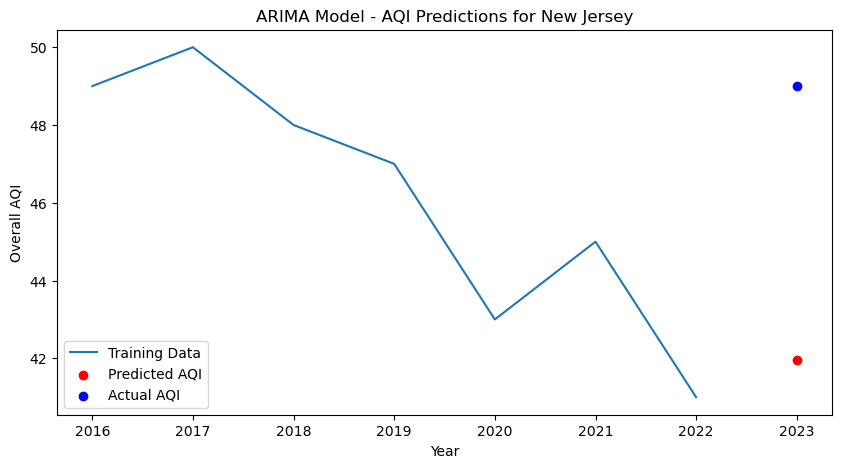

Predicted: 41.96988822079349 | Actual: 49
7.030111779206507


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

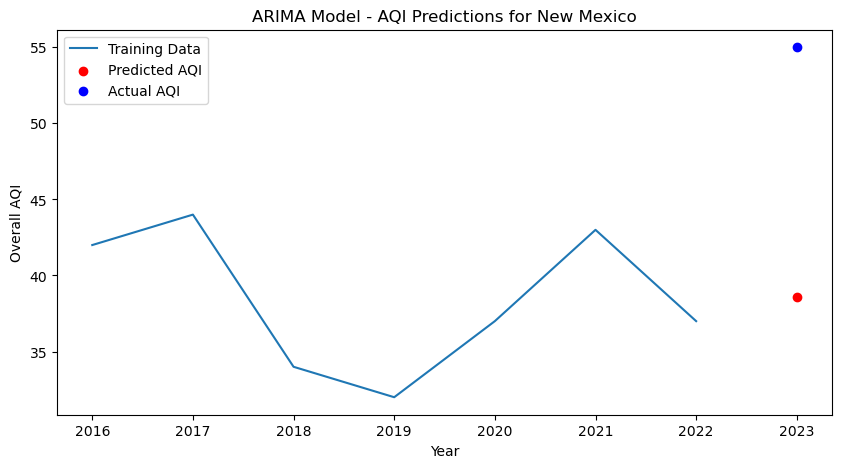

Predicted: 38.56154119437724 | Actual: 55
16.43845880562276


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

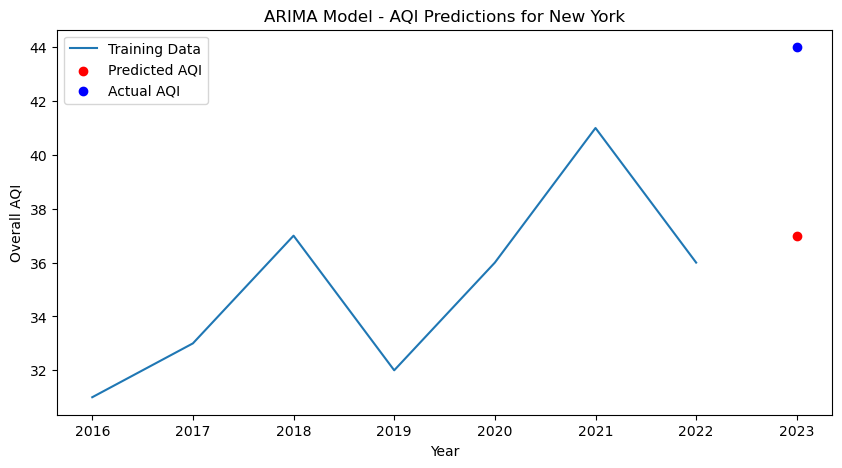

Predicted: 37.004214967896544 | Actual: 44
6.995785032103456


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

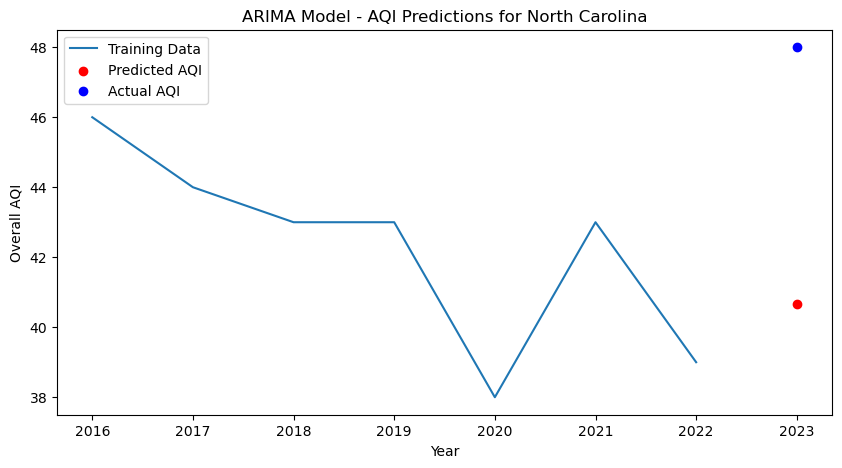

Predicted: 40.65617343584266 | Actual: 48
7.3438265641573395


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

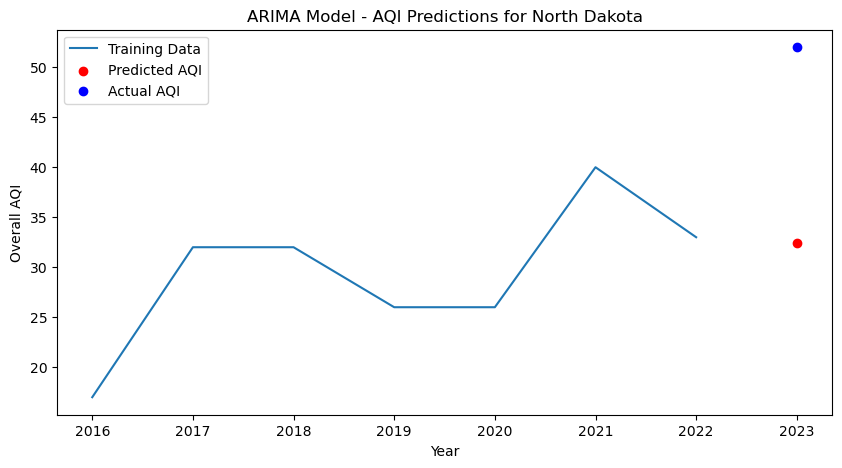

Predicted: 32.387375184489876 | Actual: 52
19.612624815510124


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

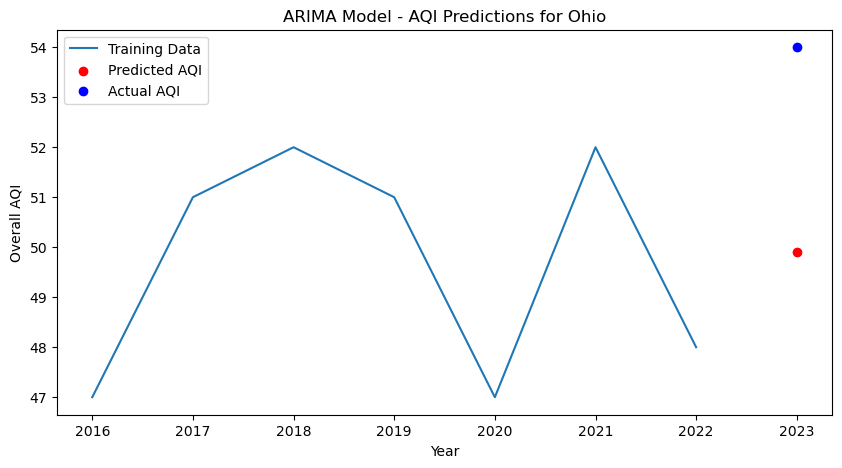

Predicted: 49.89895879367775 | Actual: 54
4.10104120632225


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

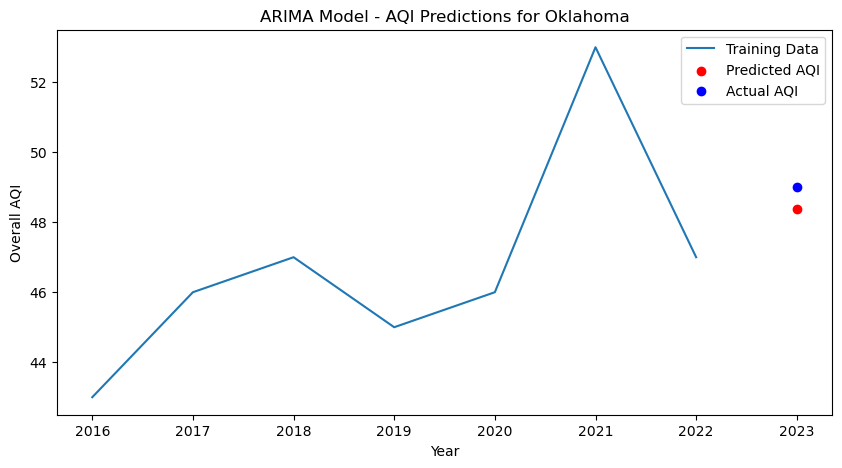

Predicted: 48.375331652414204 | Actual: 49
0.6246683475857964


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

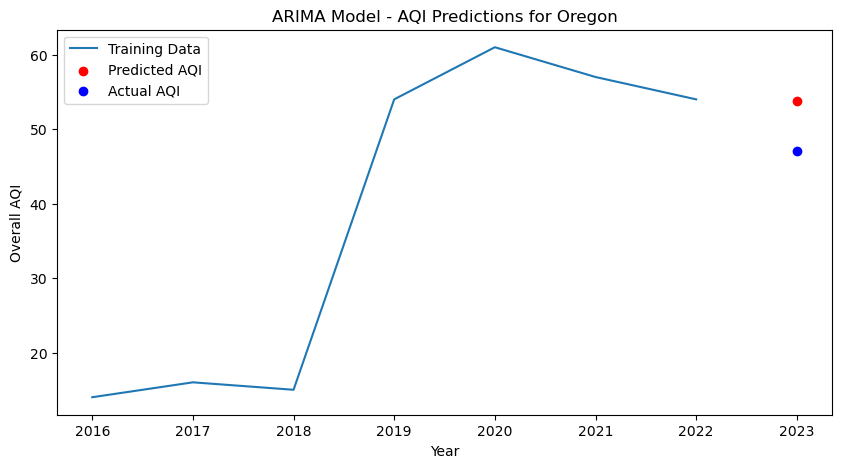

Predicted: 53.74532331770671 | Actual: 47
6.745323317706713


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

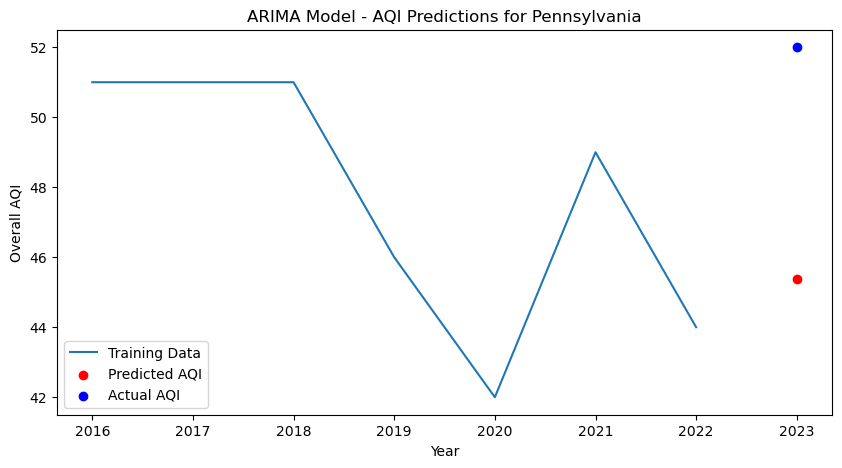

Predicted: 45.3669790851514 | Actual: 52
6.633020914848601


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

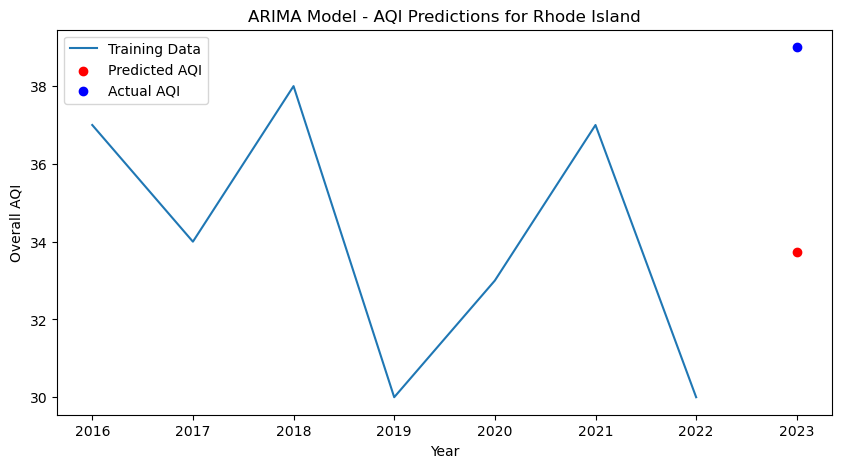

Predicted: 33.744453439749535 | Actual: 39
5.255546560250465


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

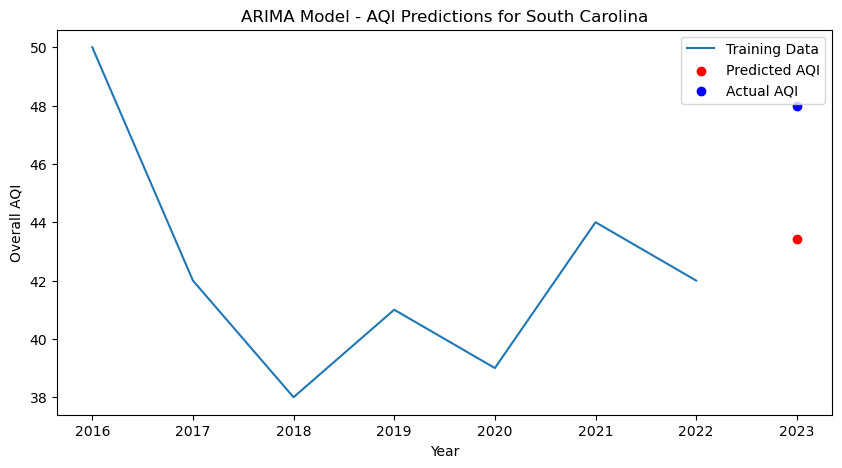

Predicted: 43.41169141622028 | Actual: 48
4.588308583779721


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

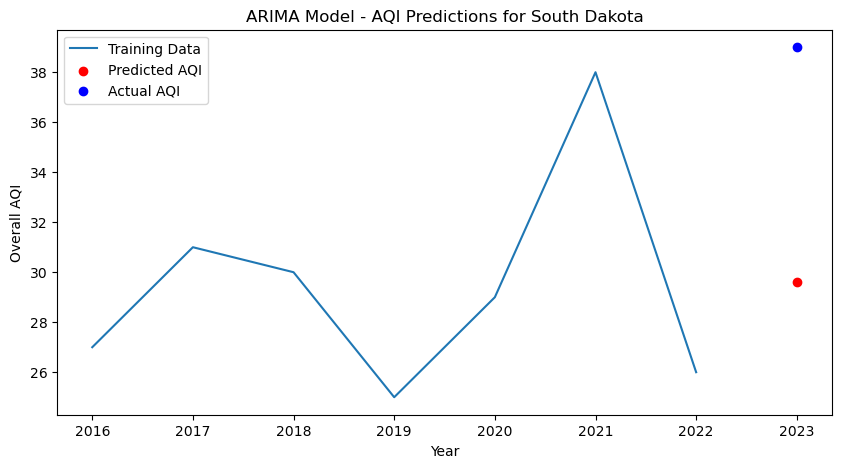

Predicted: 29.590889792763274 | Actual: 39
9.409110207236726


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

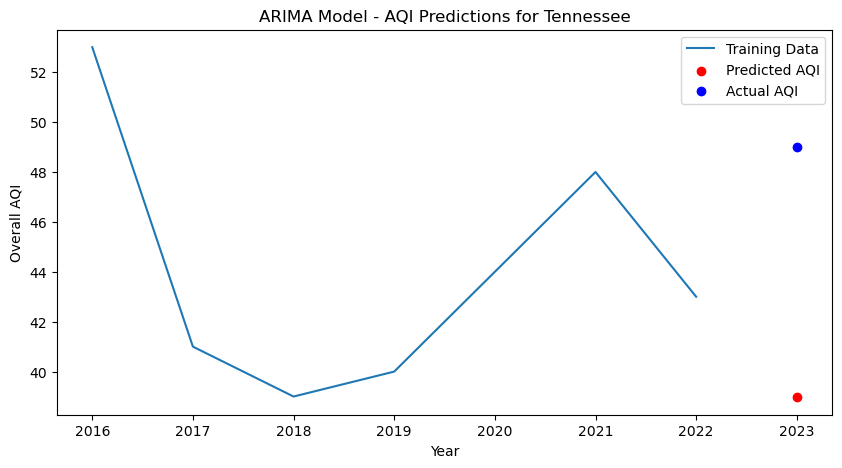

Predicted: 38.97258135201247 | Actual: 49
10.027418647987531


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

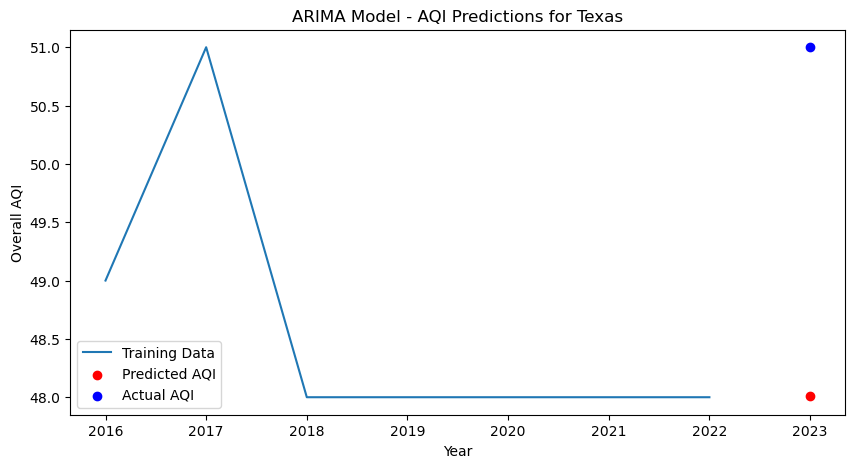

Predicted: 48.00741551701303 | Actual: 51
2.9925844829869703


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

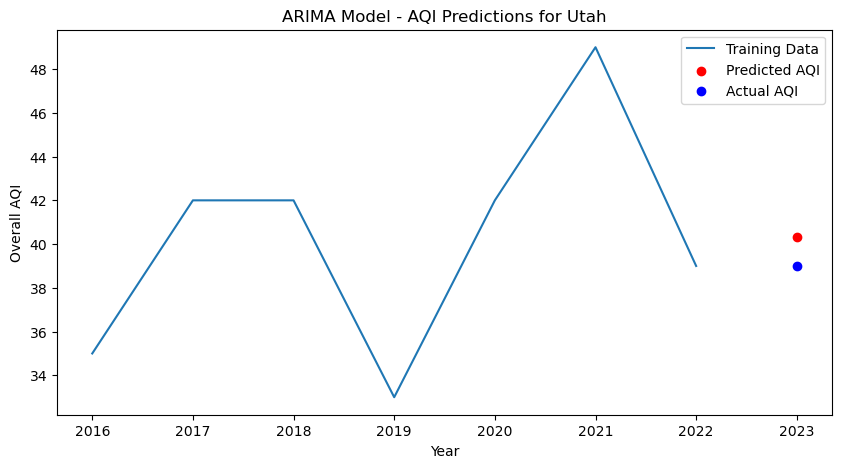

Predicted: 40.30969110414802 | Actual: 39
1.3096911041480226


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

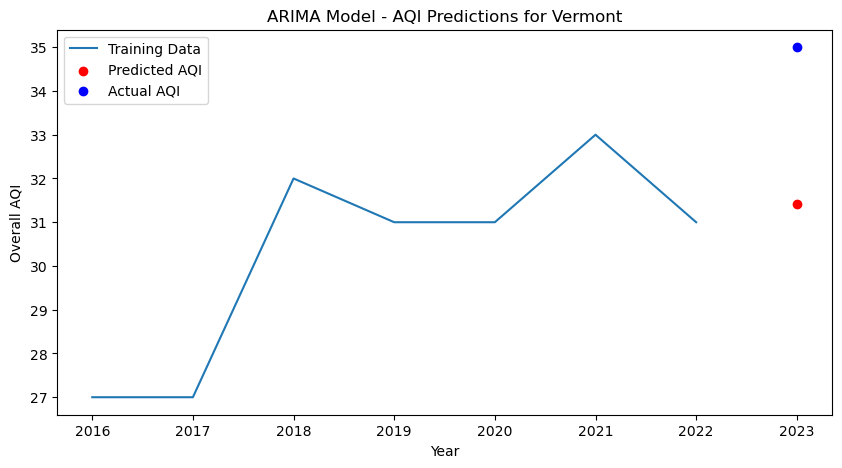

Predicted: 31.40799425026694 | Actual: 35
3.5920057497330617


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

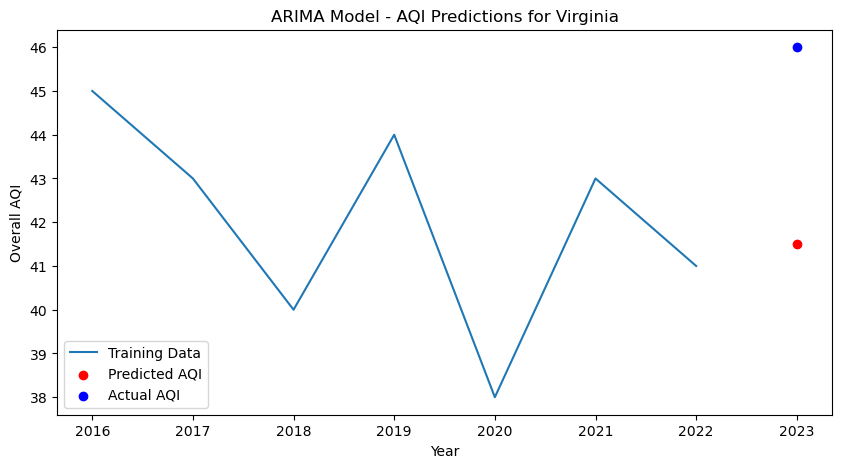

Predicted: 41.491975635391896 | Actual: 46
4.508024364608104


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

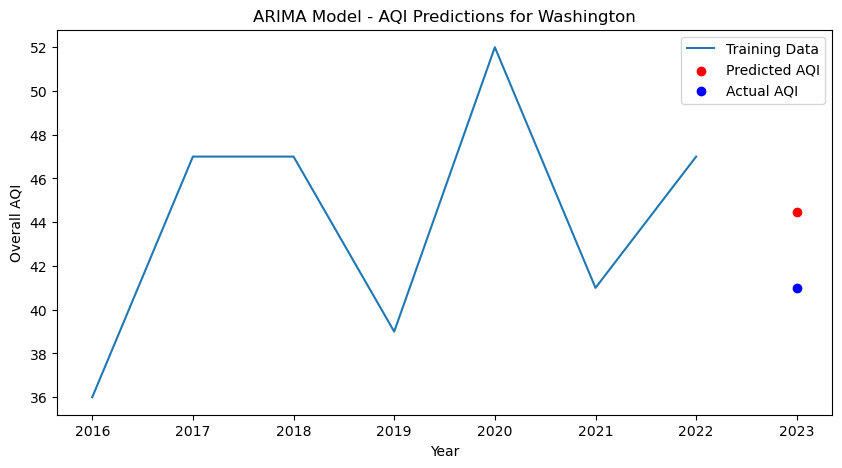

Predicted: 44.487858427128344 | Actual: 41
3.4878584271283444


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

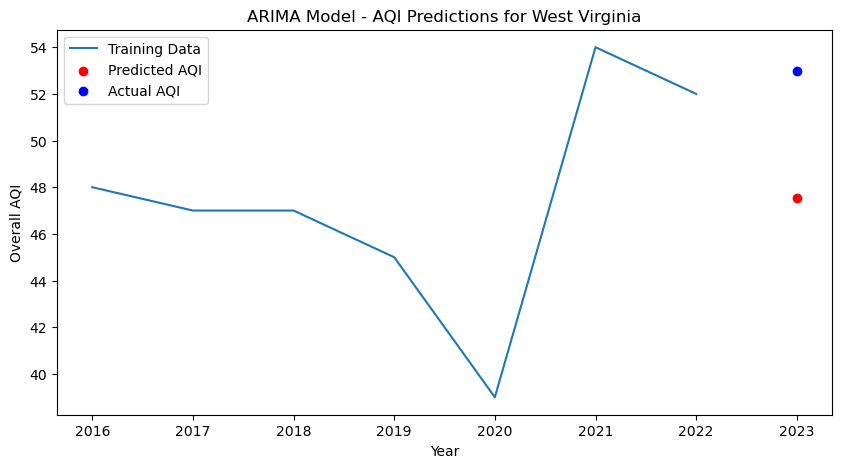

Predicted: 47.54208521341281 | Actual: 53
5.457914786587189


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

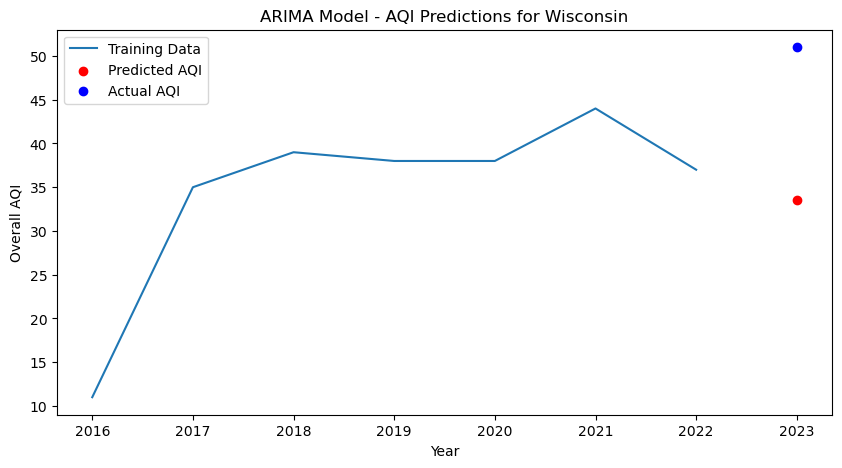

Predicted: 33.58593222172935 | Actual: 51
17.41406777827065


C:\Users\arnan\AppData\Local\Temp\ipykernel_22276\1409495143.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curr_df['Year'] = pd.to_numeric(curr_df['Year'], errors='coerce')
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\arnan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecas

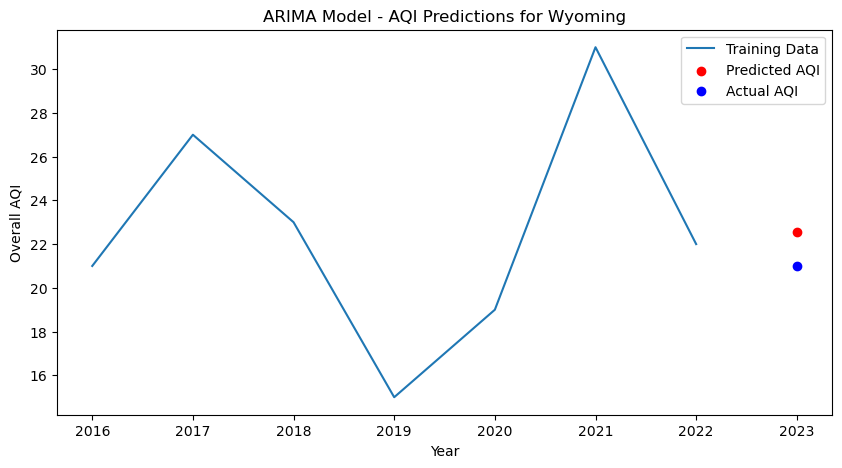

Predicted: 22.55714413142526 | Actual: 21
1.557144131425261
5.772621713046868


In [52]:
AQI_diff = []
for state in states:
    AQI_diff.append(ARMIA_MODEL(state))
print(np.mean(AQI_diff))

In [55]:
AQI_diff

[2.8554191601803254,
 4.1311911914055095,
 4.577999352045708,
 6.163140229178794,
 7.01646725708089,
 2.276157428841387,
 4.150116447933144,
 8.952071933887837,
 0.562807666039383,
 3.1141588060098826,
 1.2880267818427384,
 14.756126438922394,
 2.8757334276335627,
 3.012495313331989,
 8.521086513834717,
 3.4850925733796814,
 0.2766555473749861,
 1.5274838414128098,
 1.9254245705660438,
 2.560772854726231,
 3.355175602562305,
 9.216263607510065,
 5.969110351225112,
 7.331782160059568,
 1.9955301276272408,
 10.535272439904393,
 10.156328005410757,
 5.146038702163487,
 7.030111779206507,
 16.43845880562276,
 6.995785032103456,
 7.3438265641573395,
 19.612624815510124,
 4.10104120632225,
 0.6246683475857964,
 6.745323317706713,
 6.633020914848601,
 5.255546560250465,
 4.588308583779721,
 9.409110207236726,
 10.027418647987531,
 2.9925844829869703,
 1.3096911041480226,
 3.5920057497330617,
 4.508024364608104,
 3.4878584271283444,
 5.457914786587189,
 17.41406777827065,
 1.557144131425261]

In [56]:
print(np.mean(AQI_diff))

5.772621713046868
